In [627]:
#import csv
import pandas as pd


In [628]:
#%pip install pandas

In [629]:
df_train = pd.read_csv('./data/train_set.csv')
df_test = pd.read_csv('./data/test_set.csv')

In [630]:
df_train.columns

Index(['phone_number', 'name', 'full_address', 'latitude', 'longitude',
       'review_count', 'rating', 'website', 'types', 'city', 'verified',
       'country', 'country_corrected', 'open_info', 'cluster_type',
       'distance_to_centroid'],
      dtype='object')

In [631]:
df_train.head()

,phone_number,name,full_address,latitude,longitude,review_count,rating,website,types,city,verified,country,country_corrected,open_info,cluster_type,distance_to_centroid
0,0,Hotel am Kornmarkt GmbH,1,50.116323,8.694880,32.0,4.4,0,Hotel,Frankfurt,False,Germany,Germany,0,132,0.301253
1,1,Amusement park TERRALTITUDE,1,49.989875,4.699309,606.0,4.6,1,"Amusement park, Tourist attraction",Fumay,True,France,France,0,22,0.368996
2,1,Trust E Store Dubai,1,25.274980,55.319172,2.0,5.0,1,Electronics store,Dubai,True,United Arab Emirates,United Arab Emirates,1,17,0.293268
3,1,The Bristol Inn Hotel,1,25.273519,55.322777,87.0,3.9,1,Hotel,Dubai,True,United Arab Emirates,United Arab Emirates,0,132,0.293264
4,1,Magic Planet City Centre Al Zahia,1,25.315866,55.454474,198.0,4.2,1,"Amusement park, Amusement center, Children's a...",Sharjah,True,United Arab Emirates,United Arab Emirates,1,22,0.294698


In [632]:
#show how many countries are there which have Unknown label

df_train[df_train['country_corrected']=='Unknown'].shape

(29, 16)

In [633]:
%pip install ratelimiter

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [634]:
%pip install reverse_geocoder

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [635]:
#for each country_corrected row which has value "Unknown" run geopy and basing on longitude and latitude, assign en name of country
import reverse_geocoder as rg

def get_country(row):
    if row['country_corrected'] == 'Unknown':
        location = rg.search((row['latitude'], row['longitude']))
        return location[0]['cc']
    else:
        return row['country_corrected']

df_train['country_corrected'] = df_train.apply(get_country, axis=1)
        


In [636]:
df_train[df_train['country_corrected']=='Unknown'].shape

(0, 16)

In [637]:


#drop following columns but save them in another dataframe: name, full_adress,types, city, country,country_corrected
df_train_dropped = df_train[['name',  'types', 'city', 'country', 'country_corrected']].copy()
df_train = df_train.drop(['name',  'types', 'city', 'country', 'country_corrected'], axis=1)




In [638]:
df_train.head()

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,cluster_type,distance_to_centroid
0,0,1,50.116323,8.694880,32.0,4.4,0,False,0,132,0.301253
1,1,1,49.989875,4.699309,606.0,4.6,1,True,0,22,0.368996
2,1,1,25.274980,55.319172,2.0,5.0,1,True,1,17,0.293268
3,1,1,25.273519,55.322777,87.0,3.9,1,True,0,132,0.293264
4,1,1,25.315866,55.454474,198.0,4.2,1,True,1,22,0.294698


In [639]:
df_dummies = pd.get_dummies(df_train['cluster_type'], drop_first=True)
X = df_dummies.values

In [640]:
X.shape

(9118, 317)

In [641]:
#add X to df_train
df_train = pd.concat([df_train, df_dummies], axis=1)


In [642]:
df_train = df_train.drop(['cluster_type'], axis=1)

In [643]:
df_train.head()

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,distance_to_centroid,...,476,477,479,486,487,489,492,495,496,498
0,0,1,50.116323,8.694880,32.0,4.4,0,False,0,0.301253,...,False,False,False,False,False,False,False,False,False,False
1,1,1,49.989875,4.699309,606.0,4.6,1,True,0,0.368996,...,False,False,False,False,False,False,False,False,False,False
2,1,1,25.274980,55.319172,2.0,5.0,1,True,1,0.293268,...,False,False,False,False,False,False,False,False,False,False
3,1,1,25.273519,55.322777,87.0,3.9,1,True,0,0.293264,...,False,False,False,False,False,False,False,False,False,False
4,1,1,25.315866,55.454474,198.0,4.2,1,True,1,0.294698,...,False,False,False,False,False,False,False,False,False,False


In [644]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [645]:
import numpy as np

In [646]:
df_train.columns = df_train.columns.astype(str) 

In [647]:
# #via sklearn prepare standarizer
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df_train)
# df_train_scaled = scaler.transform(df_train)
# df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train.columns)

In [648]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)

# Convert the scaled data back to a DataFrame
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train.columns)

In [649]:
df_train_scaled.head()

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,distance_to_centroid,...,476,477,479,486,487,489,492,495,496,498
0,0.0,1.0,0.870013,0.488912,0.031031,0.850,0.0,0.0,0.0,0.120341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.868864,0.476605,0.605606,0.900,1.0,1.0,0.0,0.150973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.644164,0.632517,0.001001,1.000,1.0,1.0,1.0,0.116731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.644151,0.632528,0.086086,0.725,1.0,1.0,0.0,0.116729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.644536,0.632934,0.197197,0.800,1.0,1.0,1.0,0.117377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


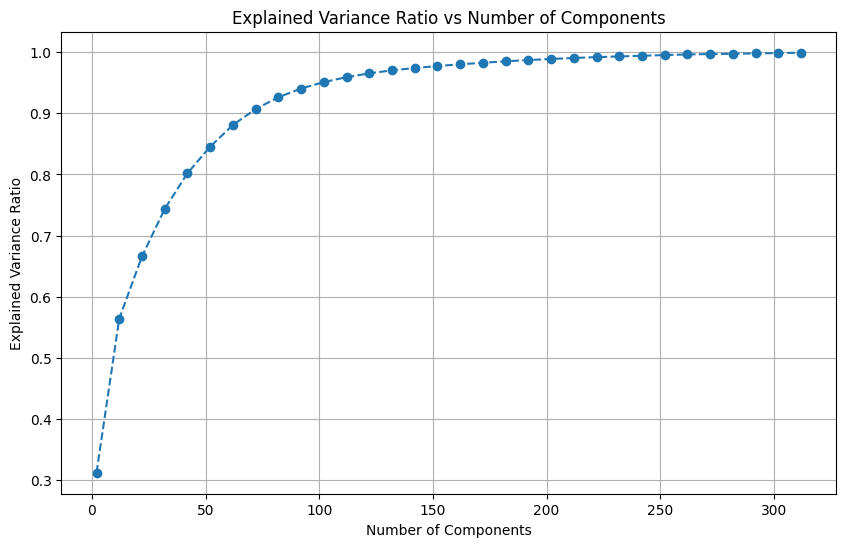

In [650]:
def explained_variance(n_components):
    pca = PCA(n_components=n_components)
    pca.fit(df_train_scaled)
    return pca.explained_variance_ratio_.sum()

# Range of n_components to test
components_range = list(range(2, df_train_scaled.shape[1]-11, 10))
explained_variances = []

# Calculate explained variance for each number of components
for n in components_range:
    explained_variances.append(explained_variance(n))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variances, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

In [651]:
#do dummy on cluster_type, PCA n=100
pca = PCA(n_components=40)
pca.fit(df_train_scaled)

#drop type_cluster from df_train_scaled and add PCA components. But I want it in dataframe
df_pca = pd.DataFrame(pca.transform(df_train_scaled))
# df_train = df_train.drop(['cluster_type'], axis=1)
# df_train_scaled = pd.concat([df_train, df_pca], axis=1)

df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.372932,0.428969,0.133915,0.155721,0.190782,-0.138524,0.166736,-0.372820,0.497911,-0.494860,...,-0.016705,0.033920,-0.014076,0.017492,0.047465,0.032463,-0.036764,0.042028,0.034396,-0.036256
1,-0.216363,0.800742,0.454923,-0.217967,0.131504,-0.015441,-0.158369,0.128901,-0.159388,0.165765,...,0.052382,-0.014788,-0.016240,-0.053164,-0.020273,0.025899,-0.050131,0.046169,-0.042578,-0.035108
2,-0.565085,-0.045035,-0.085615,0.059809,-0.233404,-0.120277,-0.185811,-0.019419,0.005007,-0.061874,...,0.053643,-0.104101,0.024816,-0.581505,0.720339,0.051779,0.163312,-0.170978,-0.055295,0.049536
3,-0.110717,0.797728,0.557367,-0.299626,-0.230222,-0.368360,0.182211,-0.337842,0.393733,-0.395244,...,-0.004790,0.014387,-0.010920,-0.002545,0.001999,-0.003158,0.031462,-0.033262,0.055562,-0.000641
4,-0.604880,0.026157,-0.054689,0.050142,-0.015292,-0.152398,-0.032961,-0.004188,-0.039413,0.052248,...,0.035136,-0.027134,-0.012109,-0.044097,-0.011017,0.013471,-0.011715,0.026665,0.064960,-0.031422


### Jak dobrać $\texttt{minPts}$ oraz $\varepsilon$?

Autorzy pracy wprowadzającej DBSCAN proponują następującą metodę wyboru odpowiednich wartości $\texttt{minPts}$ oraz $\varepsilon$:
1. Ustaw $\texttt{minPts}$ na podwojony wymiar danych (np. dla danych dwuwymiarowych $\texttt{minPts}=4$).
2. Dla każdego punktu oblicz odległość do $(\texttt{minPts} − 1)$ najbliższego sąsiada (różnego od ustalonego punktu).
3. Otrzymane odległości od największej i przedstaw na wykresie: na osi $x$ znajdują się numery punktów (po sortowaniu), a na osi $y$ odległości tych punktów od najbliższych sąsiadów.
4. Obserwacje po lewej stronie wykresu znajdują się daleko od swoich sąsiadów, więc można uznać że są odstające. Znajdź ostatni 'duży skok' (lub łokieć) na wykresie i wybierz wartość odległości jako $\varepsilon$. Obserwacje po lewej stronie tego skoku będą zaklasyfikowane jako odstające a na prawo trafią do klastrów. 

In [652]:
df_train_scaled_original = df_train_scaled.copy()
df_train_scaled=df_pca.copy() #dla jasnosci, ew. do zmiany
df_train_scaled.columns = df_train_scaled.columns.astype(str)

In [653]:
df_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.372932,0.428969,0.133915,0.155721,0.190782,-0.138524,0.166736,-0.372820,0.497911,-0.494860,...,-0.016705,0.033920,-0.014076,0.017492,0.047465,0.032463,-0.036764,0.042028,0.034396,-0.036256
1,-0.216363,0.800742,0.454923,-0.217967,0.131504,-0.015441,-0.158369,0.128901,-0.159388,0.165765,...,0.052382,-0.014788,-0.016240,-0.053164,-0.020273,0.025899,-0.050131,0.046169,-0.042578,-0.035108
2,-0.565085,-0.045035,-0.085615,0.059809,-0.233404,-0.120277,-0.185811,-0.019419,0.005007,-0.061874,...,0.053643,-0.104101,0.024816,-0.581505,0.720339,0.051779,0.163312,-0.170978,-0.055295,0.049536
3,-0.110717,0.797728,0.557367,-0.299626,-0.230222,-0.368360,0.182211,-0.337842,0.393733,-0.395244,...,-0.004790,0.014387,-0.010920,-0.002545,0.001999,-0.003158,0.031462,-0.033262,0.055562,-0.000641
4,-0.604880,0.026157,-0.054689,0.050142,-0.015292,-0.152398,-0.032961,-0.004188,-0.039413,0.052248,...,0.035136,-0.027134,-0.012109,-0.044097,-0.011017,0.013471,-0.011715,0.026665,0.064960,-0.031422


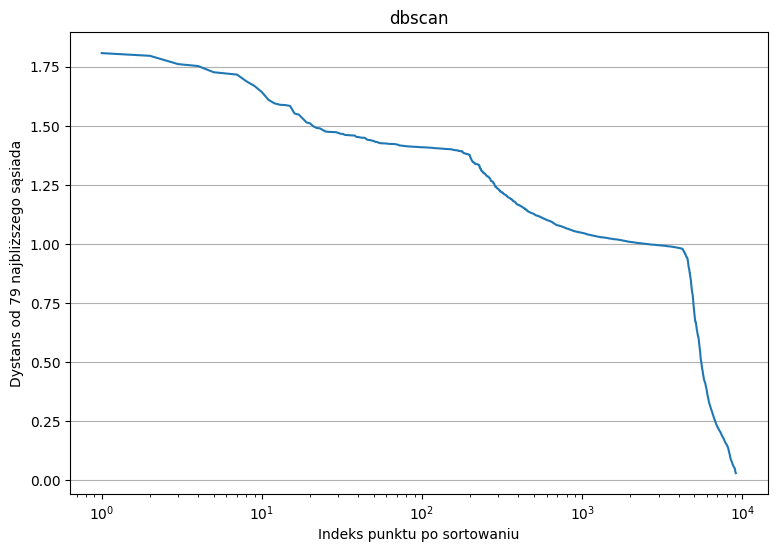

In [654]:
import sklearn.neighbors
import matplotlib.pyplot as plt

# Ustalamy minPts na podwojony wymiar danych
minPts = 2 * df_train_scaled.shape[1]
#minPts = 1 * df_train_scaled.shape[1]

# Obliczamy odległości do (minPts - 1) najbliższego sąsiada
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df_train_scaled)
distances, indices = nbrs.kneighbors(df_train_scaled)

# Sortujemy odległości od największej do najmniejszej
distanceDec = sorted(distances[:,minPts-1], reverse=True)

# Rysujemy wykres
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel(f'Dystans od {minPts-1} najbliższego sąsiada')
ax1.plot(list(range(1,df_train_scaled.shape[0]+1)), distanceDec)
plt.title('dbscan')
plt.xscale('log')
plt.grid(axis='y')

plt.show()

In [655]:
#prepare DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2 * df_train_scaled.shape[1])
dbscan.fit(df_train_scaled)
df_train_scaled['dbscam_cluster'] = dbscan.labels_



In [656]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define the range of eps values
eps_values = np.linspace(0.3, 1.5, 100)  # Adjust the number of points as needed

# Initialize variables to store the best eps and the lowest number of -1s
best_eps = None
lowest_noise = np.inf

# Loop over the eps values
for eps in eps_values:
    # Fit the DBSCAN model
    dbscan = DBSCAN(eps=eps,min_samples=2 * df_train_scaled.shape[1])
    labels = dbscan.fit_predict(df_train_scaled)

    # Count the number of -1s
    noise_count = np.count_nonzero(labels == -1)

    # If this model has less noise than the previous best, update the best eps and lowest noise
    if noise_count < lowest_noise:
        best_eps = eps
        lowest_noise = noise_count

print(f"Best eps: {best_eps}, Lowest noise: {lowest_noise}")

Best eps: 1.4151515151515153, Lowest noise: 0


In [657]:
df_train_scaled['dbscam_cluster'].value_counts()

dbscam_cluster
0    9118
Name: count, dtype: int64

In [658]:
%pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [659]:
import hdbscan

# Ustalamy min_cluster_size na podwojony wymiar danych
min_cluster_size = 2 * df_train_scaled.shape[1]

# Dopasowujemy model HDBSCAN do naszych danych
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
cluster_labels = clusterer.fit_predict(df_train_scaled)

# Wyświetlamy etykiety klastrów
df_train_scaled['hdbscam_cluster'] = cluster_labels

print(cluster_labels)

[-1 12 -1 ... -1 11 -1]


In [660]:
#summarize the results
df_train_scaled['hdbscam_cluster'].value_counts()

hdbscam_cluster
-1     5088
 16    1168
 11     563
 9      279
 6      263
 5      222
 17     196
 12     169
 7      150
 10     145
 4      120
 1      112
 14     103
 3       97
 2       95
 13      90
 15      87
 0       86
 8       85
Name: count, dtype: int64

In [661]:
#copy df_train_scaled dbscam_cluster to df_train
df_train['hdbscam_cluster'] = df_train_scaled['hdbscam_cluster']
df_train['dbscam_cluster'] = df_train_scaled['dbscam_cluster']

In [662]:
df_train.head()

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,distance_to_centroid,...,479,486,487,489,492,495,496,498,hdbscam_cluster,dbscam_cluster
0,0,1,50.116323,8.694880,32.0,4.4,0,False,0,0.301253,...,False,False,False,False,False,False,False,False,-1,0
1,1,1,49.989875,4.699309,606.0,4.6,1,True,0,0.368996,...,False,False,False,False,False,False,False,False,12,0
2,1,1,25.274980,55.319172,2.0,5.0,1,True,1,0.293268,...,False,False,False,False,False,False,False,False,-1,0
3,1,1,25.273519,55.322777,87.0,3.9,1,True,0,0.293264,...,False,False,False,False,False,False,False,False,5,0
4,1,1,25.315866,55.454474,198.0,4.2,1,True,1,0.294698,...,False,False,False,False,False,False,False,False,16,0


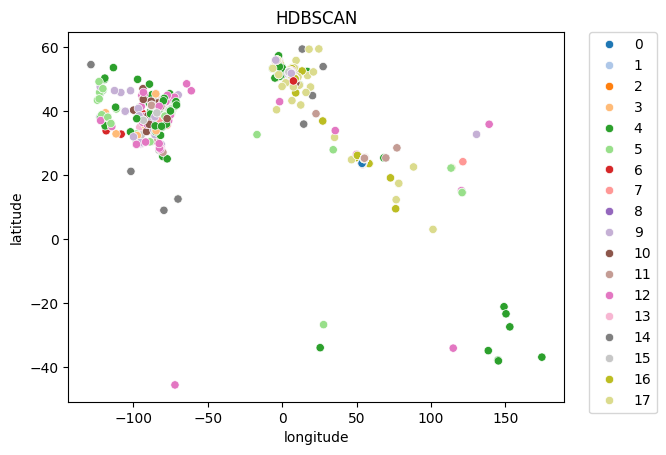

In [663]:


#visualize the dbscan results on plot, but do not show -1
import seaborn as sns

sns.scatterplot(data=df_train[df_train['hdbscam_cluster']!=-1], y='latitude', x='longitude',hue='hdbscam_cluster',  palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('HDBSCAN')
plt.show()





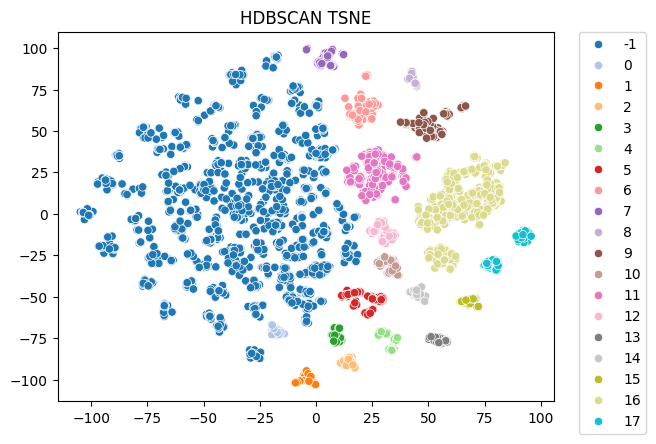

In [664]:
#print tsne for hdbscan
from sklearn.manifold import TSNE

# Initialize TSNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform TSNE to the scaled data
tsne_transformed = tsne.fit_transform(df_train_scaled)

#visualise it on 2d plot
sns.scatterplot(x=tsne_transformed[:,0], y=tsne_transformed[:,1], hue=df_train['hdbscam_cluster'], palette='tab20')
plt.title('HDBSCAN TSNE')
#legend to right dude
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

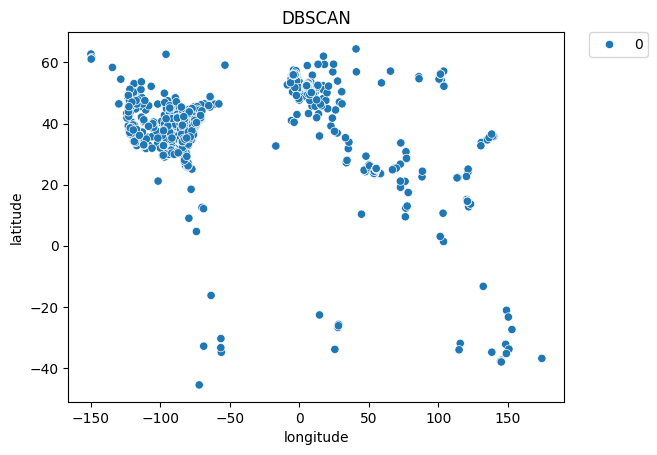

In [665]:


#visualize the dbscan results on plot, but do not show -1
import seaborn as sns

sns.scatterplot(data=df_train[df_train['dbscam_cluster']!=-1], y='latitude', x='longitude',hue='dbscam_cluster',  palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('DBSCAN')
plt.show()





## Bye bye DBSCAN, hello kmeans

In [666]:
df_train_scaled_original.shape

(9118, 327)

In [667]:
#do dummy on cluster_type, PCA n=100
pca = PCA(n_components=100)
pca.fit(df_train_scaled_original)

#drop type_cluster from df_train_scaled and add PCA components. But I want it in dataframe
df_pca = pd.DataFrame(pca.transform(df_train_scaled_original))
# df_train = df_train.drop(['cluster_type'], axis=1)
# df_train_scaled = pd.concat([df_train, df_pca], axis=1)

df_pca.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.372932,0.428969,0.133915,0.155721,0.190782,-0.138523,0.166729,-0.372789,0.497864,-0.495010,...,-0.000748,0.009078,0.000218,-0.005186,0.006902,-0.007547,-0.002156,-0.009871,-0.006713,0.000574
1,-0.216363,0.800742,0.454923,-0.217968,0.131506,-0.015449,-0.158302,0.128572,-0.158998,0.166637,...,0.002343,0.007350,-0.003460,-0.007614,-0.000235,-0.000048,-0.006154,-0.003717,-0.003380,-0.005773
2,-0.565085,-0.045035,-0.085615,0.059809,-0.233404,-0.120282,-0.185768,-0.019445,0.005244,-0.062022,...,0.002832,0.003230,-0.002617,-0.002223,-0.006028,-0.004882,-0.007133,0.002017,0.002561,-0.001906
3,-0.110717,0.797728,0.557367,-0.299626,-0.230221,-0.368362,0.182219,-0.337845,0.393745,-0.395273,...,0.002419,0.022149,-0.001924,-0.007764,-0.004732,-0.013109,-0.007980,0.005768,0.001900,0.001180
4,-0.604880,0.026157,-0.054689,0.050141,-0.015290,-0.152409,-0.032888,-0.004522,-0.039006,0.053199,...,0.003781,0.027383,-0.009406,-0.011489,-0.009012,-0.016458,-0.011668,0.008311,0.004201,-0.002330


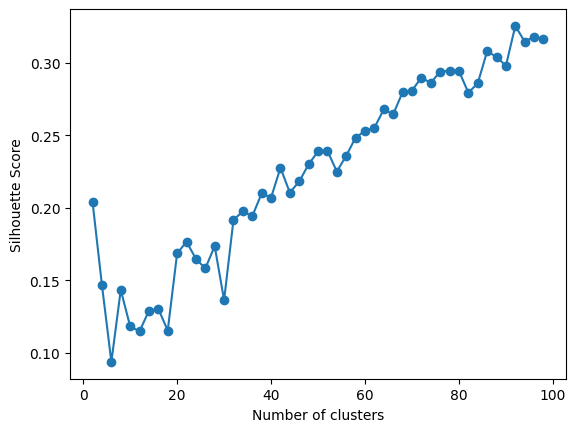

In [668]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of cluster numbers
cluster_range = range(2, 100,2)  # Adjust as needed

# Initialize lists to store the silhouette scores and cluster numbers
silhouette_scores = []
cluster_numbers = []

# Loop over the cluster numbers
for n_clusters in cluster_range:
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(df_pca)

    # Calculate the silhouette score and append it to the list
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)
    cluster_numbers.append(n_clusters)

# Plot the silhouette scores
plt.plot(cluster_numbers, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

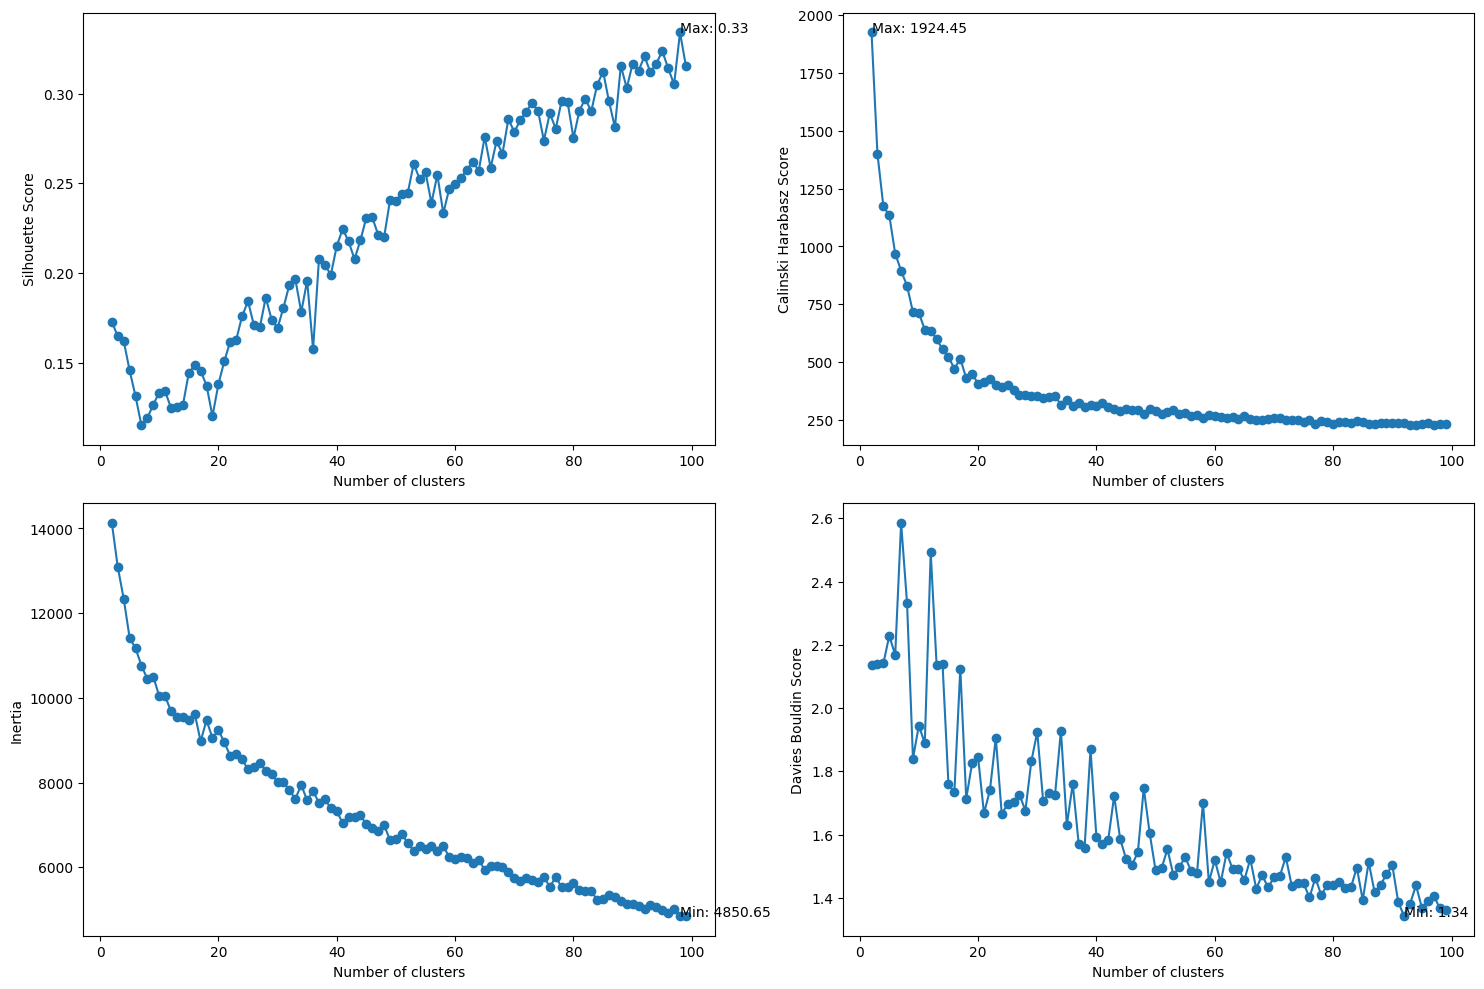

In [669]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Define the range of cluster numbers
cluster_range = range(2, 100)  # Adjust as needed

# Initialize lists to store the scores and cluster numbers
silhouette_scores = []
calinski_harabasz_scores = []
inertia_scores = []
davies_bouldin_scores = []
cluster_numbers = []

# Loop over the cluster numbers
for n_clusters in cluster_range:
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(df_pca)

    # Calculate the scores and append them to the lists
    silhouette_scores.append(silhouette_score(df_pca, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(df_pca, labels))
    inertia_scores.append(kmeans.inertia_)
    davies_bouldin_scores.append(davies_bouldin_score(df_pca, labels))
    cluster_numbers.append(n_clusters)

# Plot the scores
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(cluster_numbers, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
max_sil = max(silhouette_scores)
max_sil_index = silhouette_scores.index(max_sil)
plt.annotate(f'Max: {max_sil:.2f}', (cluster_numbers[max_sil_index], max_sil))

plt.subplot(2, 2, 2)
plt.plot(cluster_numbers, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz Score')
max_cal = max(calinski_harabasz_scores)
max_cal_index = calinski_harabasz_scores.index(max_cal)
plt.annotate(f'Max: {max_cal:.2f}', (cluster_numbers[max_cal_index], max_cal))

plt.subplot(2, 2, 3)
plt.plot(cluster_numbers, inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
min_iner = min(inertia_scores)
min_iner_index = inertia_scores.index(min_iner)
plt.annotate(f'Min: {min_iner:.2f}', (cluster_numbers[min_iner_index], min_iner))

plt.subplot(2, 2, 4)
plt.plot(cluster_numbers, davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
min_dav = min(davies_bouldin_scores)
min_dav_index = davies_bouldin_scores.index(min_dav)
plt.annotate(f'Min: {min_dav:.2f}', (cluster_numbers[min_dav_index], min_dav))

plt.tight_layout()
plt.show()


In [670]:
print(f"Optimal number of clusters according to Silhouette Score: {cluster_numbers[max_sil_index]}")
print(f"Optimal number of clusters according to Calinski Harabasz Score: {cluster_numbers[max_cal_index]}")
print(f"Optimal number of clusters according to Inertia: {cluster_numbers[min_iner_index]}")
print(f"Optimal number of clusters according to Davies Bouldin Score: {cluster_numbers[min_dav_index]}")

Optimal number of clusters according to Silhouette Score: 98
Optimal number of clusters according to Calinski Harabasz Score: 2
Optimal number of clusters according to Inertia: 98
Optimal number of clusters according to Davies Bouldin Score: 92


In [671]:
df_pca.columns = df_pca.columns.astype(str)

In [672]:
#do kmeans on 100 and print it on t sne
kmeans = KMeans(n_clusters=90)
kmeans.fit(df_pca)
df_pca['kmeans_cluster'] = kmeans.labels_





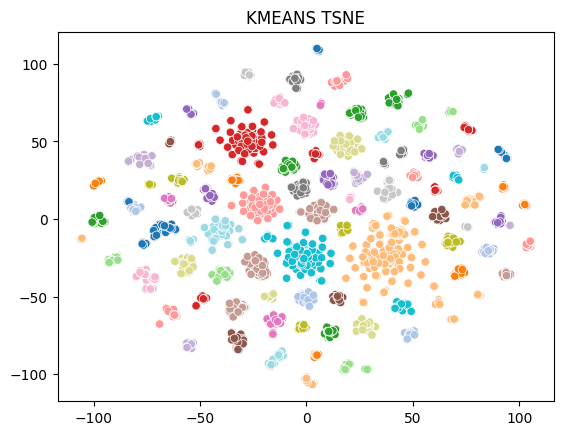

In [673]:
# do tsne on df_pca and visualise it on 2d plot

from sklearn.manifold import TSNE

# Initialize TSNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform TSNE to the scaled data
tsne_transformed = tsne.fit_transform(df_pca)

#visualise it on 2d plot
sns.scatterplot(x=tsne_transformed[:,0], y=tsne_transformed[:,1], hue=df_pca['kmeans_cluster'], palette='tab20')
plt.title('KMEANS TSNE')
#remove legend
plt.legend([],[], frameon=False)


Text(0.5, 1.0, 'KMEANS')

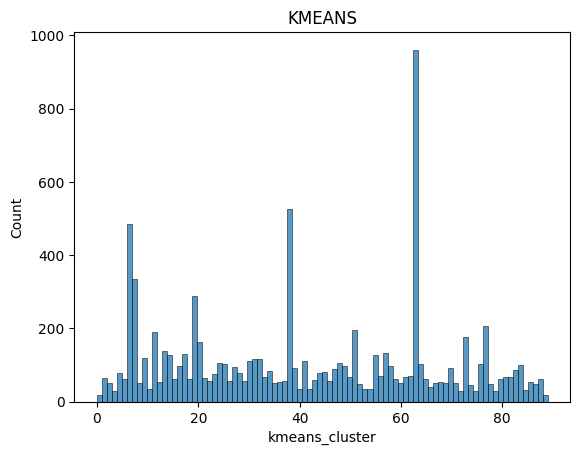

In [674]:
#print cluster distribution
df_pca['kmeans_cluster'].value_counts()
#and now on plot - cluster vs number of points
sns.histplot(df_pca['kmeans_cluster'], bins=90)
plt.title('KMEANS')



In [675]:
#basing on df_train show all rows which have cluster equal to 19. every row in pca has kmeans_cluster
df_train_dropped[df_pca['kmeans_cluster']==19]['name']

12                         Peter Lougheed Provincial Park
29                                Simmons-Rockwell Nissan
49      Vasanta Bhavan Vegetarian Restaurant | Al Nahd...
149                                       Hurghada Museum
153                                        ProWash - 1080
                              ...                        
8945                     Crossroads Dental Clinic - Deira
8947     Kuwait Hospital Sharjah - مستشفى الكويت بالشارقة
8960                                          Bennets Bar
9066                            Gaelan Hospital - Sharjah
9072                               Yosemite National Park
Name: name, Length: 287, dtype: object

In [676]:
from sklearn.mixture import GaussianMixture

In [677]:
#now basing on df_train_scaled_original prepare gaussian mixture model
gmm = GaussianMixture(n_components=90, covariance_type='full')
gmm.fit(df_pca)
labels = gmm.predict(df_pca)
#save labels to df_pca
df_pca['gmm_cluster'] = labels


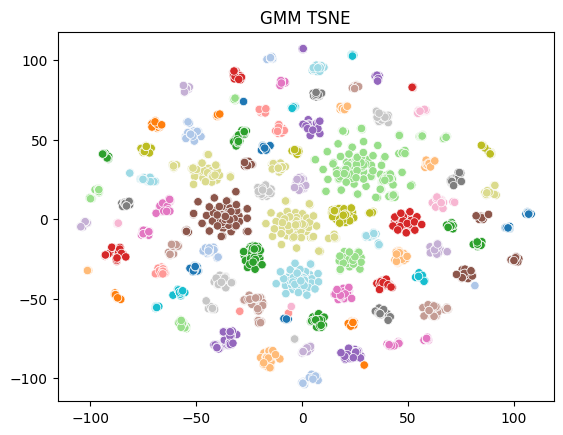

In [678]:
#visualise it on tsne 2d
tsne = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne.fit_transform(df_pca)

sns.scatterplot(x=tsne_transformed[:,0], y=tsne_transformed[:,1], hue=labels, palette='tab20')
plt.title('GMM TSNE')
plt.legend([],[], frameon=False)
plt.show()

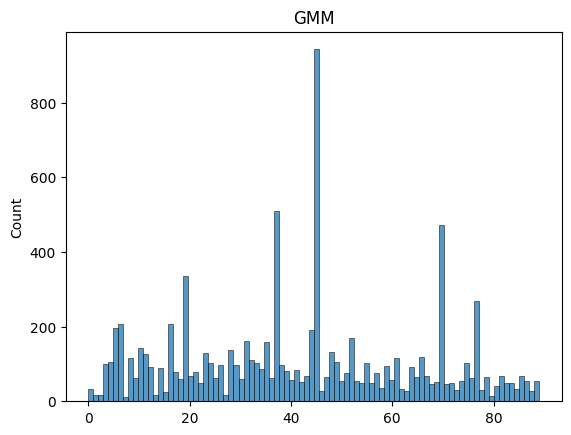

In [679]:
#also prepare hist with 20 bins
sns.histplot(labels, bins=90)
plt.title('GMM')
plt.show()

In [680]:
df_train_dropped[df_pca['gmm_cluster']==65].head()

,name,types,city,country,country_corrected
219,Al Neemah Automatic Laundry,Laundry,Sharjah,United Arab Emirates,United Arab Emirates
298,Up To Date Laundry,Laundry,Sharjah,United Arab Emirates,United Arab Emirates
663,مغسله زمن كلوبترا Cleopatra time laundry,Laundry service,Sharjah,United Arab Emirates,United Arab Emirates
829,Classic Laundry,Laundry service,Dubai,United Arab Emirates,United Arab Emirates
841,Laundry Al Full Wal Yasemeen,Laundry service,Sharjah,United Arab Emirates,United Arab Emirates


In [681]:
#assign labels to df_train_droped
df_train['gmm_cluster'] = df_pca['gmm_cluster']
df_gmm = df_train['gmm_cluster'].copy()
df_train.drop('hdbscam_cluster', axis=1, inplace=True)

#prepare random forest in order to interprete the results
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('gmm_cluster', axis=1), df_train['gmm_cluster'], test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict the labels
y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 0.98


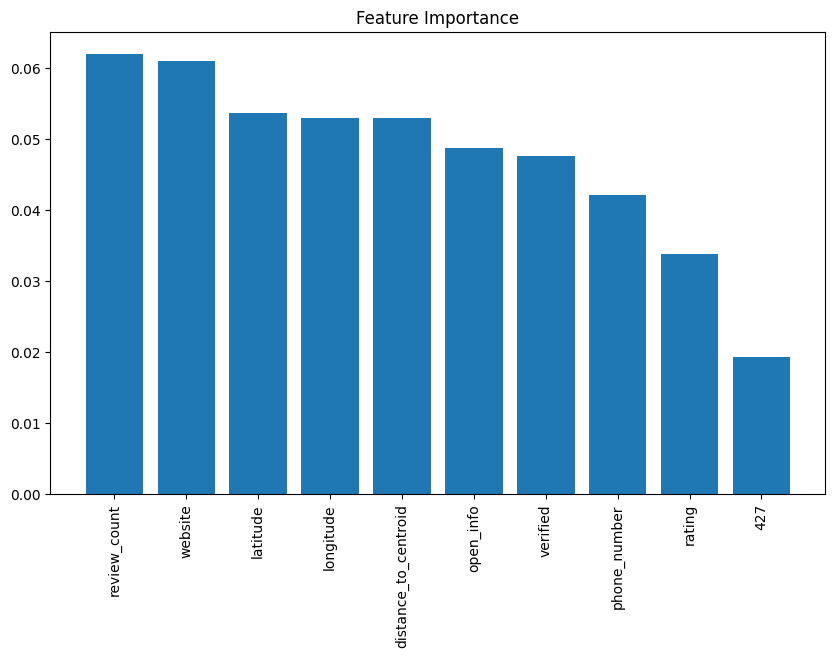

In [682]:
#visualize random forest feature importance, but only top 10
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.title('Feature Importance')
plt.show()

In [683]:
df_train = pd.concat([df_train, df_train_dropped], axis=1)

In [707]:
#now write me a code which from df_train via sample gets 1 random row and find 5 closest rows (in terms of only on latitude and longitude and the same gmm_cluster) from df_train
#merge df_train with df_train_dropped


import numpy as np

# Sample a random row
sample = df_train.sample(1)

# Filter df_train for rows with the same gmm_cluster as the sample

sample[['name','types','city','country_corrected','gmm_cluster']]

,name,types,city,country_corrected,gmm_cluster
4520,Police Scotland,Police department,Burntisland,United Kingdom,14


In [708]:
same_cluster = df_train[df_train['gmm_cluster'] == sample['gmm_cluster'].values[0]]

# Calculate the Euclidean distance between the sample and all other rows in the same cluster
same_cluster['distance'] = np.sqrt((same_cluster['latitude'] - sample['latitude'].values[0])**2 + 
                                   (same_cluster['longitude'] - sample['longitude'].values[0])**2)

# Sort by distance
same_cluster_sorted = same_cluster.sort_values('distance')

# Get the 5 closest rows (excluding the first one because it's the sample itself)
closest_rows = same_cluster_sorted.iloc[1:6]

closest_rows[['name','types','city','country_corrected','gmm_cluster']]


/tmp/ipykernel_13659/2778447899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_cluster['distance'] = np.sqrt((same_cluster['latitude'] - sample['latitude'].values[0])**2 +


,name,types,city,country_corrected,gmm_cluster
7165,British Transport Police,Police station,Kirkcaldy,United Kingdom,14
2587,Police Scotland Drylaw Police Station,Police station,Edinburgh,United Kingdom,14
5028,Police Scotland Dalgety Bay Police Station,Police department,Dunfermline,United Kingdom,14
8293,Police Scotland Edinburgh,"Police department, Police station",Edinburgh,United Kingdom,14
1897,Police Scotland Wester Hailes Police Station,"Police department, Police station",Edinburgh,United Kingdom,14
